In [34]:
import matplotlib.pyplot as plt
import numpy as np
import re

In [28]:
class model():

    def __init__(self, model_path):
        self.model_path = model_path
        self.d_fake = self.split_list_into_chunks(self.extract_loss_values(self.model_path)['D loss fake'])
        self.d_real = self.split_list_into_chunks(self.extract_loss_values(self.model_path)['D loss real'])

        self.g_loss = self.split_list_into_chunks(self.extract_loss_values(self.model_path)['G loss'])
        self.g_adv = self.split_list_into_chunks(self.extract_loss_values(self.model_path)['Adv loss'])
        self.g_rec = self.split_list_into_chunks(self.extract_loss_values(self.model_path)['Rec loss'])
    
    def extract_loss_values(self, file_path):
        # Dictionary to hold lists of loss values for each category
        loss_values = {
            "D loss fake": [],
            "D loss real": [],
            "G loss": [],
            "Rec loss": [],
            "Adv loss": []
        }

        # Regular expression to match the pattern of each loss type and its value
        pattern = r"- (D loss fake|D loss real|G loss|Rec loss|Adv loss): (-?\d+\.\d+)"

        try:
            with open(file_path, 'r') as file:
                for line in file:
                    matches = re.findall(pattern, line)
                    for match in matches:
                        loss_type, value = match
                        loss_values[loss_type].append(float(value))

        except IOError:
            print("Error: File does not appear to exist.")

        return loss_values
    
    def split_list_into_chunks(self, input_list, chunk_size=21):
        return [input_list[i:i + chunk_size] for i in range(0, len(input_list), chunk_size)]

In [78]:
model_b_1 = model('./results/balloons_downsampled_1/log.txt')
model_b_2 = model('./results/balloons_downsampled_2/log.txt')
model_b_3 = model('./results/balloons_downsampled_3/log.txt')
model_b_4 = model('./results/balloons_downsampled_4/log.txt')
model_b_5 = model('./results/balloons_downsampled_5/log.txt')
model_b_6 = model('./results/balloons_downsampled_6/log.txt')
model_p_1 = model('./results/pyramids_downsampled_1/log.txt')
model_p_2 = model('./results/pyramids_downsampled_2/log.txt')
model_p_3 = model('./results/pyramids_downsampled_3/log.txt')
model_p_4 = model('./results/pyramids_downsampled_4/log.txt')
model_p_5 = model('./results/pyramids_downsampled_5/log.txt')

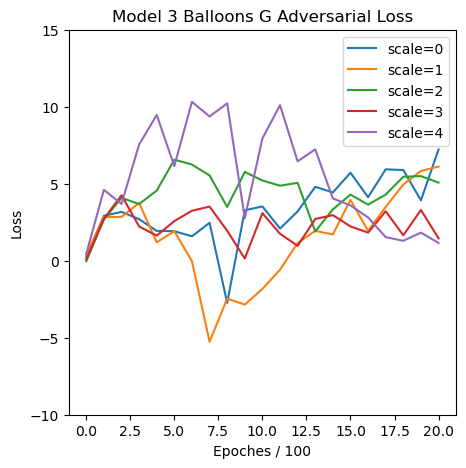

In [96]:
plt.figure(figsize=(5,5))
for i in range(5):
    plt.plot(model_b_3.g_adv[i], label=f'scale={i}')
plt.title(f'Model 3 Balloons G Adversarial Loss')
plt.xlabel('Epoches / 100')
plt.ylabel('Loss')
plt.ylim(-10,15)
plt.legend()

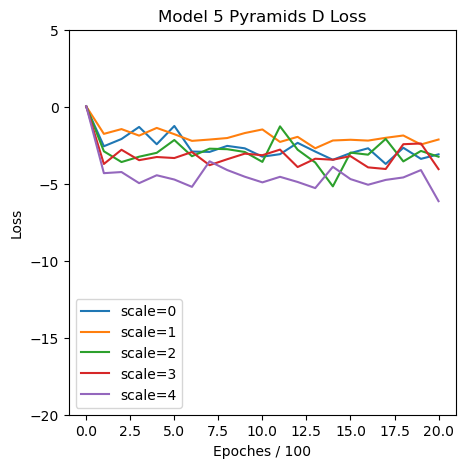

In [106]:
plt.figure(figsize=(5,5))
for i in range(5):
    plt.plot([x-z for x, z in zip(model_p_5.d_fake[i], model_p_5.d_real[i])], label=f'scale={i}')
plt.title(f'Model 5 Pyramids D Loss')
plt.xlabel('Epoches / 100')
plt.ylabel('Loss')
plt.ylim(-20,5)
plt.legend()